<a href="https://colab.research.google.com/github/Anirudh0413/Anirudh0413-alfido-project/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
movies_cols = ['MovieID','Title','Genres']
ratings_cols = ['UserID','MovieID','Rating','Timestamp']
users_cols = ['UserID','Gender','Age','Occupation','Zip-code']

In [6]:
# DataSet 1
movies = pd.read_csv('/content/Movie RP.txt', sep = '::',header = None, names = movies_cols, encoding = 'latin 1')

# DataSet 2
ratings = pd.read_csv('/content/Movie RP Ratings.txt',sep = '::', header = None, names = ratings_cols)

# DataSet 3
users = pd.read_csv('/content/Movie RP User.txt',sep = '::', header = None, names = users_cols)

<ipython-input-6-f42b106736d2>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('/content/Movie RP.txt', sep = '::',header = None, names = movies_cols, encoding = 'latin 1')
<ipython-input-6-f42b106736d2>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('/content/Movie RP Ratings.txt',sep = '::', header = None, names = ratings_cols)
<ipython-input-6-f42b106736d2>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid thi

In [7]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10.0,48067
1,2,M,56,16.0,70072
2,3,M,25,15.0,55117
3,4,M,45,7.0,02460
4,5,M,25,20.0,55455


Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [10]:
merge_on_movieid = pd.merge(movies,ratings,on = 'MovieID').reset_index(drop = True)
merge_on_movieid.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [11]:
merge_on_userid = pd.merge(merge_on_movieid, users, on = 'UserID').reset_index(drop = True)
merge_on_userid.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10.0,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10.0,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10.0,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10.0,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10.0,48067


In [12]:
master_data = merge_on_userid.drop(['Genres','Timestamp','Zip-code'],axis = 1)
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10.0
1,48,Pocahontas (1995),1,5,F,1,10.0
2,150,Apollo 13 (1995),1,5,F,1,10.0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10.0
4,527,Schindler's List (1993),1,5,F,1,10.0


In [13]:
merge_on_userid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MovieID     3008 non-null   int64  
 1   Title       3008 non-null   object 
 2   Genres      3008 non-null   object 
 3   UserID      3008 non-null   int64  
 4   Rating      3008 non-null   int64  
 5   Timestamp   3008 non-null   int64  
 6   Gender      3008 non-null   object 
 7   Age         3008 non-null   int64  
 8   Occupation  3008 non-null   float64
 9   Zip-code    3008 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 235.1+ KB


Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

1. User Age Distribution
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

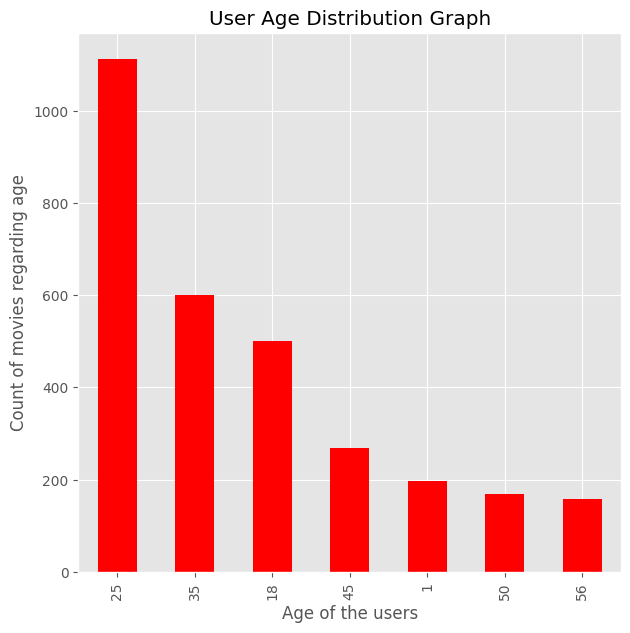

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
# user age distribution
style.use('ggplot')
plt.figure(figsize = (7,7))
master_data['Age'].value_counts().plot(kind = 'bar', color = 'red')
plt.xlabel('Age of the users')
plt.ylabel('Count of movies regarding age')
plt.title('User Age Distribution Graph')
plt.show()

<Figure size 700x700 with 0 Axes>

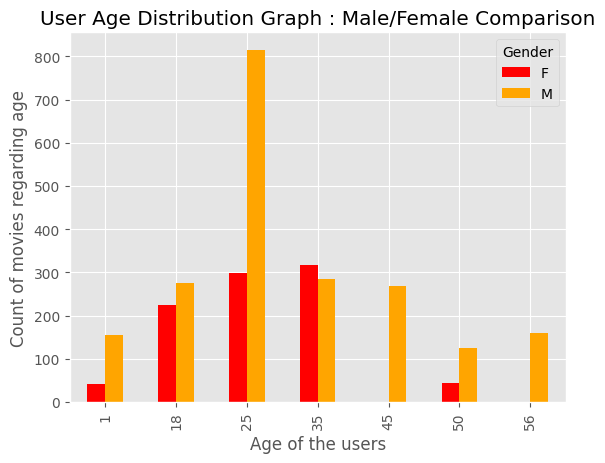

In [15]:
# user age distribution
plt.figure(figsize = (7,7))
master_data.groupby('Age')['Gender'].value_counts().unstack().plot(kind = 'bar',color = ['red','orange'])
plt.xlabel('Age of the users')
plt.ylabel('Count of movies regarding age')
plt.title('User Age Distribution Graph : Male/Female Comparison')
plt.show()

<ipython-input-16-2f3014bcd051>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_data['Age'],hist = False)


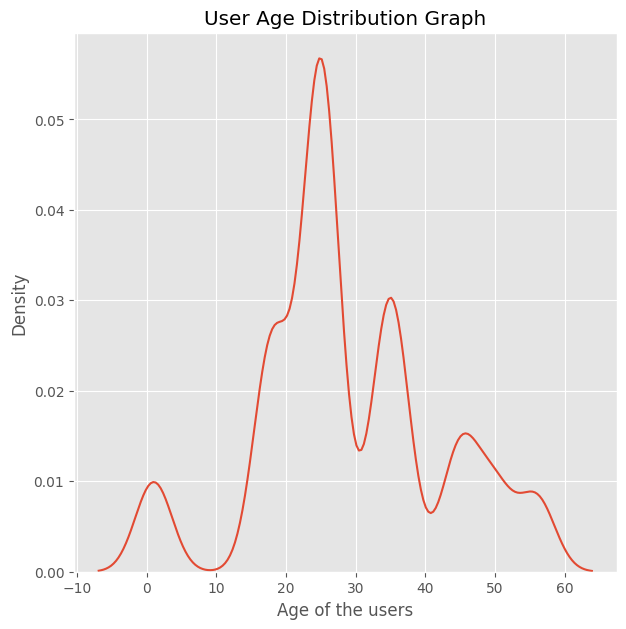

In [16]:
plt.figure(figsize = (7,7))
sns.distplot(master_data['Age'],hist = False)
plt.xlabel('Age of the users')
plt.ylabel('Density')
plt.title('User Age Distribution Graph')
plt.show()

Above graphs show that persons belonging to the "25-34" age group have the highest possibility to watch movies or i can also say that most people watch movies between the age of "25-34" which doesn't depend on gender.
It also tells that males have higher tendency to watch movies than females in every age group.

In [17]:
# User Rating of the movie Toy Story
toy_story = master_data[master_data['Title'] == 'Toy Story (1995)'].drop(['Occupation','Age','Gender','MovieID','UserID'],axis = 1)
toy_story.rename({'Title':'Toy Story'},axis = 1, inplace = True)
toy_story.head()

,Toy Story,Rating
0,Toy Story (1995),5
41,Toy Story (1995),4
86,Toy Story (1995),4
184,Toy Story (1995),5
259,Toy Story (1995),5


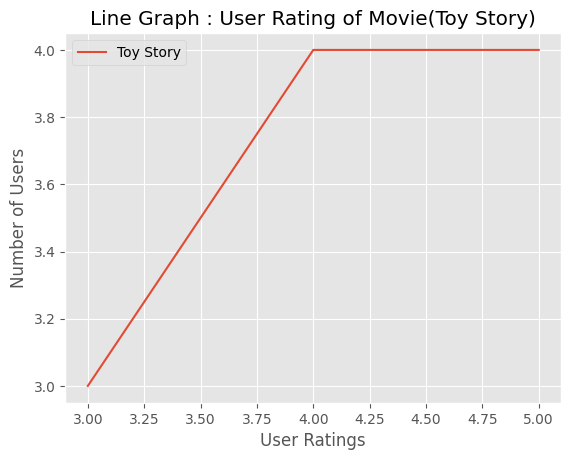

In [18]:
toy_story.groupby('Rating').count().plot(kind='line')
plt.title('Line Graph : User Rating of Movie(Toy Story)')
plt.xlabel('User Ratings')
plt.ylabel('Number of Users')
plt.show()

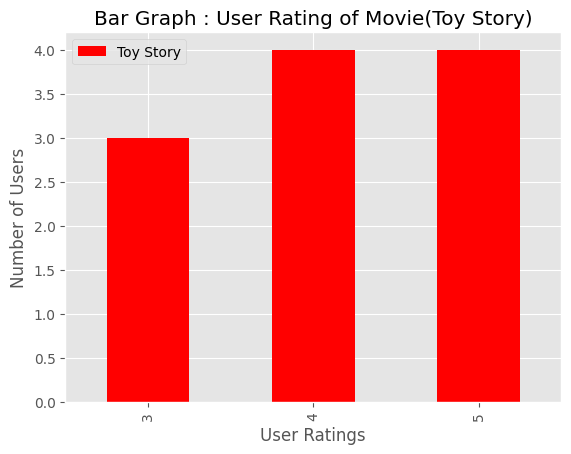

In [19]:
toy_story.groupby('Rating').count().plot(kind='bar', color = 'red')
plt.title('Bar Graph : User Rating of Movie(Toy Story)')
plt.xlabel('User Ratings')
plt.ylabel('Number of Users')
plt.show()

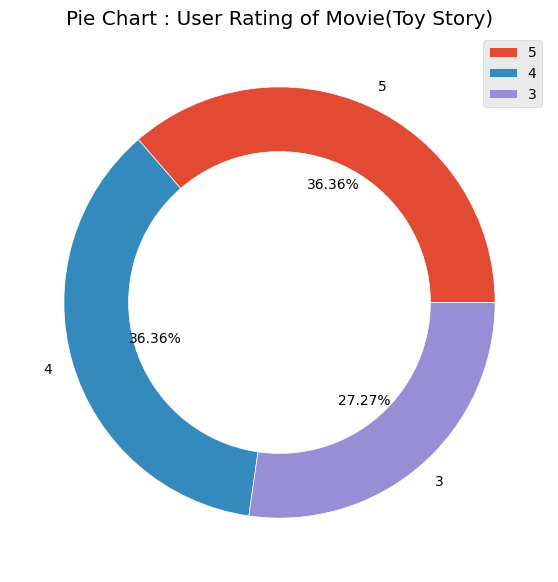

In [20]:
plt.figure(figsize=(7,7))
plt.pie(list(toy_story['Rating'].value_counts()),
        labels=list(toy_story['Rating'].value_counts().keys()),
        wedgeprops=dict(width=0.3, edgecolor='w'), autopct = '%0.2f%%', radius=1)
plt.title('Pie Chart : User Rating of Movie(Toy Story)')
plt.legend()
plt.show()

Above Graphs Show that most of the viewers have given 4 stars and 5 stars to the movie. There are very few viewers who have provides 1 or 2 stars to the movie.

In [22]:
 #Top 25 movies by viewership ratings
top_25 = master_data.groupby('Title')['Rating'].mean().round(2).sort_values(ascending = False)[:25]
top_25

Title
Better Off Dead... (1985)                                    5.0
Mr. Wonderful (1993)                                         5.0
Charade (1963)                                               5.0
Beautiful Thing (1996)                                       5.0
On Golden Pond (1981)                                        5.0
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)         5.0
Producers, The (1968)                                        5.0
Happiest Millionaire, The (1967)                             5.0
Legend (1985)                                                5.0
Seventh Seal, The (Sjunde inseglet, Det) (1957)              5.0
Mr. Smith Goes to Washington (1939)                          5.0
Shaggy Dog, The (1959)                                       5.0
Until the End of the World (Bis ans Ende der Welt) (1991)    5.0
Program, The (1993)                                          5.0
American History X (1998)                                    5.0
Heaven & Earth (199

In [39]:
# Find out all the unique genres
genres = list(movies['Genres'].unique())

In [42]:
for i in list(unique_genres):
    master_data[i] = merge_on_userid['Genres'].str.contains(i)*1
master_data

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Crime,Adventure,Action,...,Children's,Thriller,Documentary,Musical,War,Western,Comedy,Romance,Animation,Drama
0,1,Toy Story (1995),1,5,F,1,10.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,48,Pocahontas (1995),1,5,F,1,10.0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,150,Apollo 13 (1995),1,5,F,1,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,527,Schindler's List (1993),1,5,F,1,10.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,1225,Amadeus (1984),14,4,M,35,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3004,1263,"Deer Hunter, The (1978)",14,5,M,35,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3005,1968,"Breakfast Club, The (1985)",14,2,M,35,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3006,1982,Halloween (1978),14,1,M,35,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
